In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import ray
import os
from sklearn.linear_model import LinearRegression

try:
    ray.init(log_to_driver=False)
except RuntimeError:
    ray.shutdown()
    ray.init(log_to_driver=False)
    
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']


new_coin_names = ['BTC',  'CRIX',  'BITX', 'BITW100', 'BITW20', 'BITW70',
                  'ADA', 'ETH', 'LTC', 'XRP']

start = '2019-10-21'

In [2]:
ES5 = lambda x: ES(0.05, x)
ES1 = lambda x: ES(0.01, x)
VaR5 = lambda x: VaR(0.05, x)
VaR1 = lambda x: ES(0.01, x)
ERM = lambda x: ERM_estimate_trapezoidal(10, x)

risk_measure_arr = [Variance, ES5, ES1, VaR5, VaR1, ERM, Variance]
rm_dict = dict(zip(risk_measures, risk_measure_arr))

risk_measure_name = ['Variance', 'ES 95%', 'ES 99%', 'VaR 95%', 'VaR 99%', 'ERM', 'Variance']

rm2name =  dict(zip(risk_measures, risk_measure_name))

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


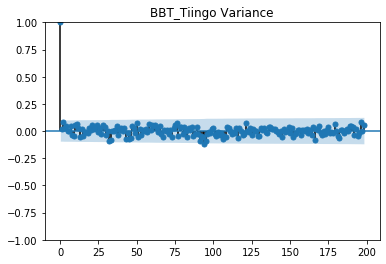

399 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


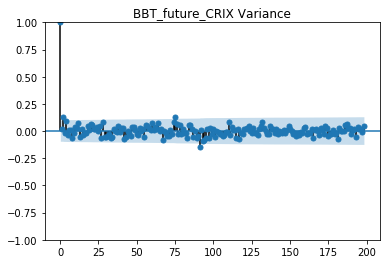

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


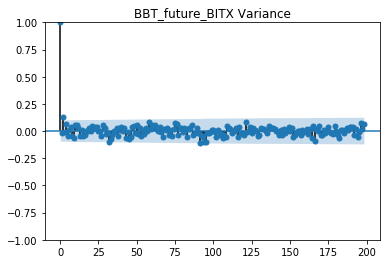

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


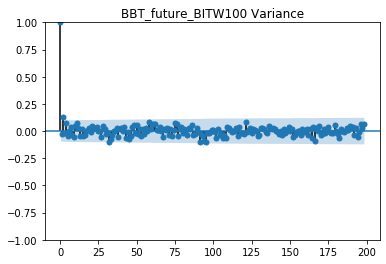

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


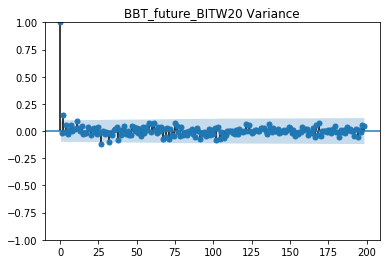

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


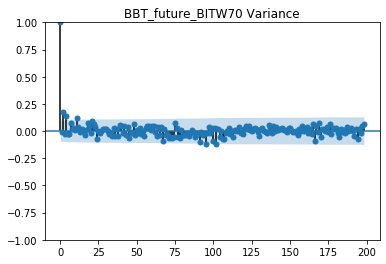

400 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


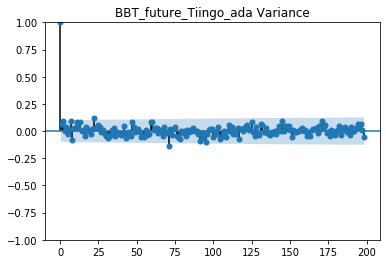

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


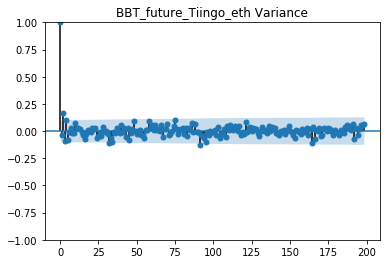

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


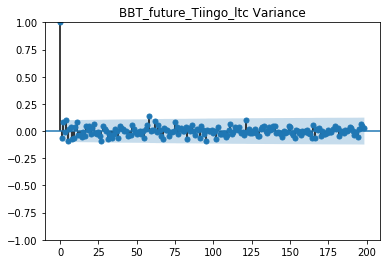

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


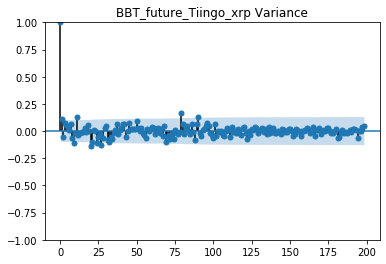

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


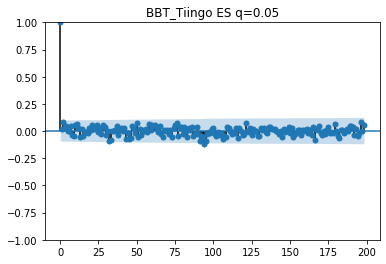

399 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


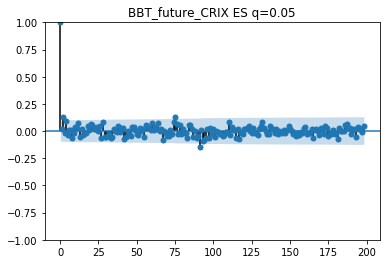

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


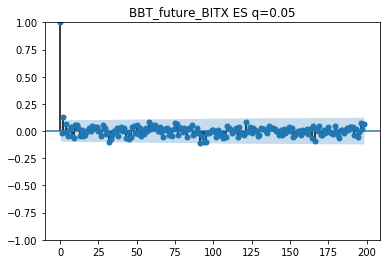

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


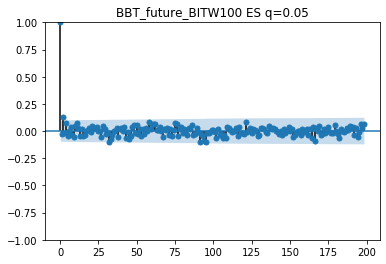

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


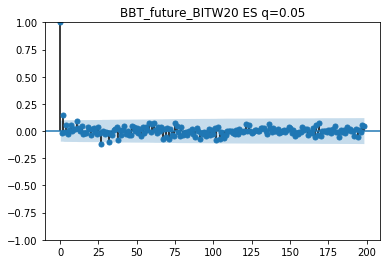

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


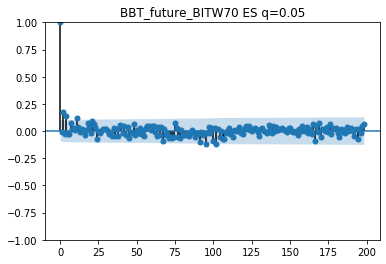

400 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


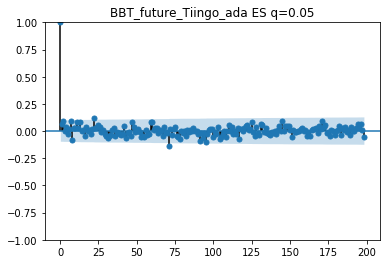

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


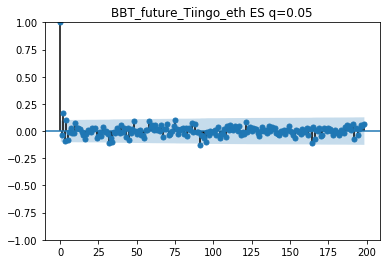

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


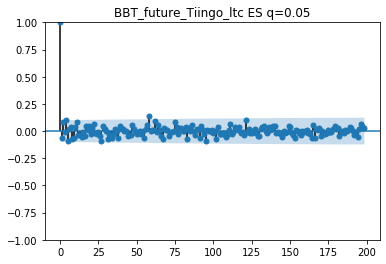

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


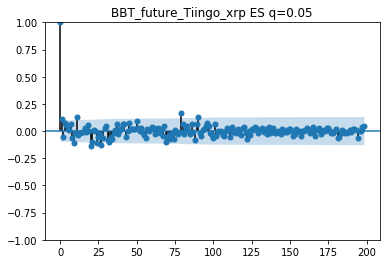

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


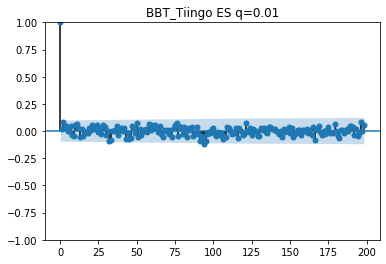

399 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


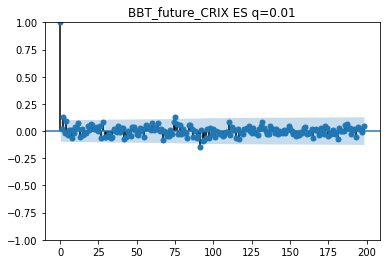

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


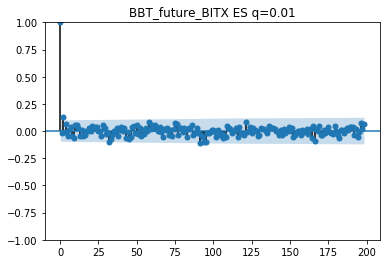

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


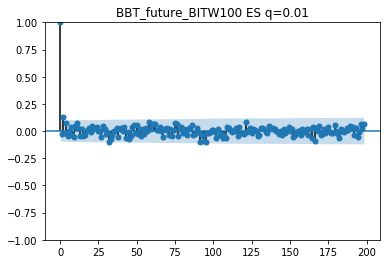

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


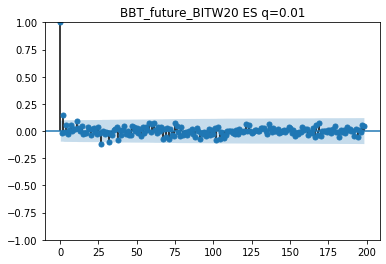

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


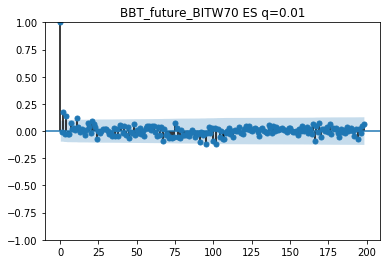

400 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


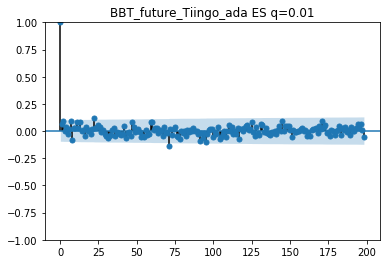

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


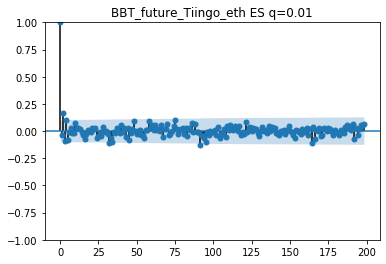

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


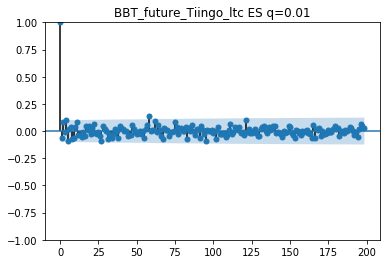

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


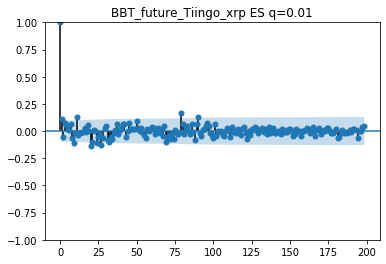

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


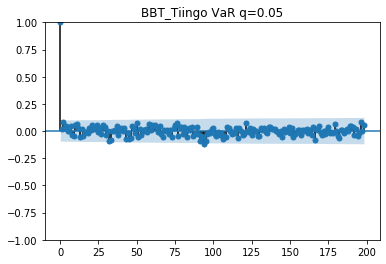

399 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


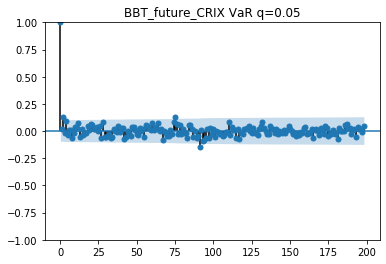

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


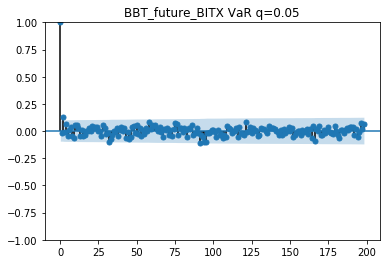

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


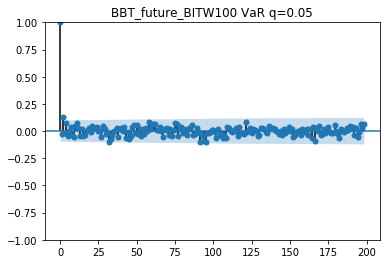

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


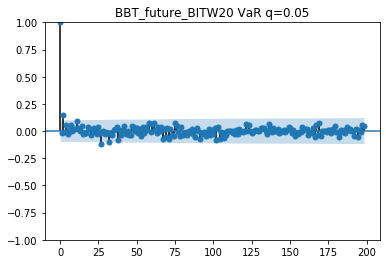

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


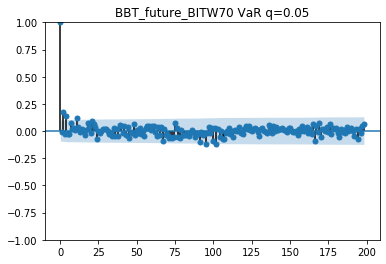

400 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


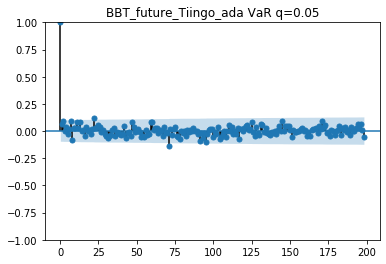

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


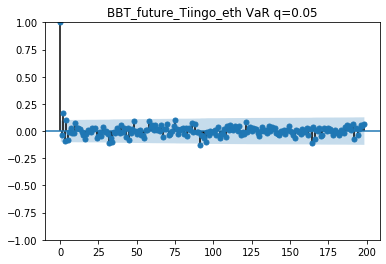

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


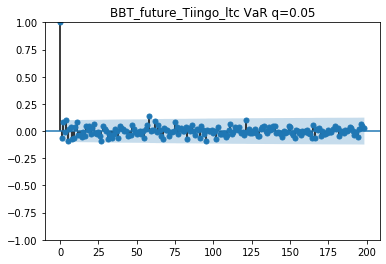

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


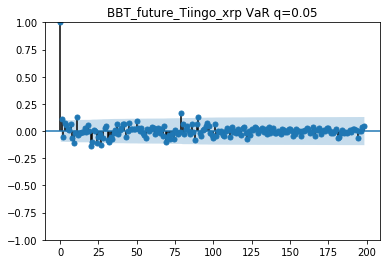

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


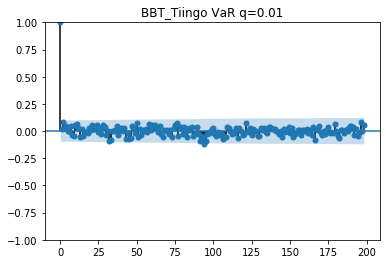

399 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


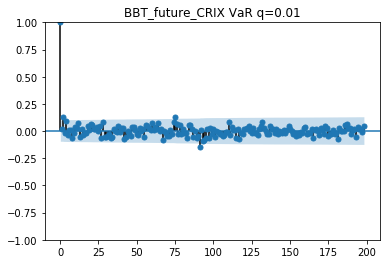

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


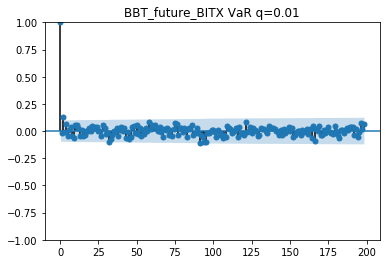

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


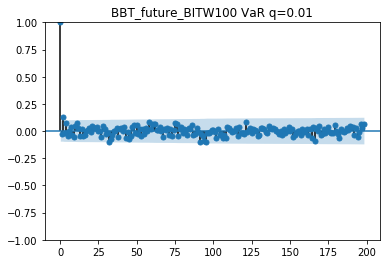

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


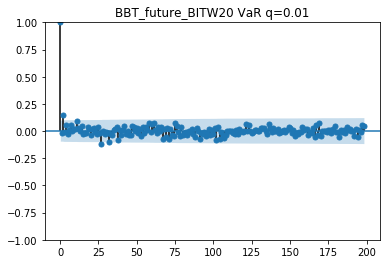

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


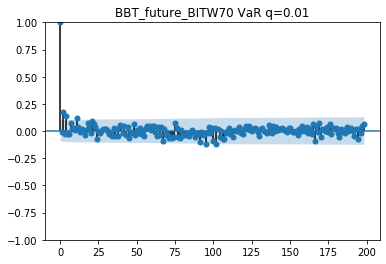

400 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


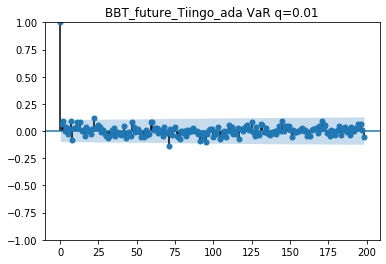

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


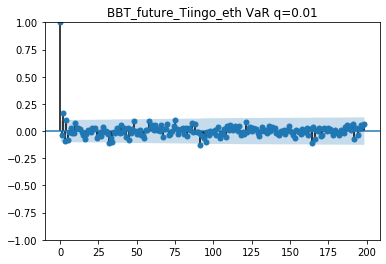

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


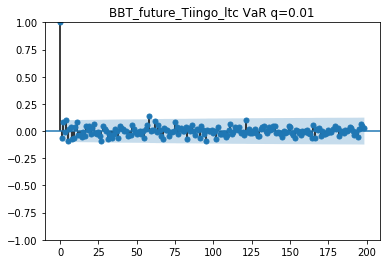

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


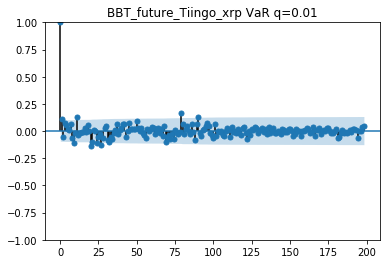

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


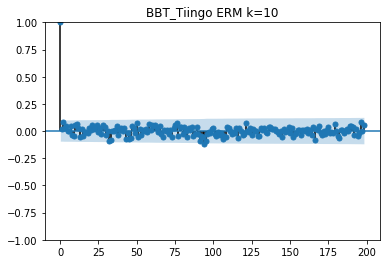

399 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


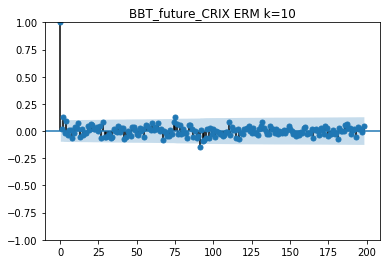

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


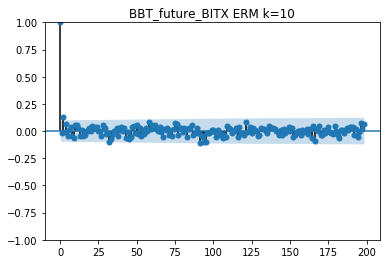

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


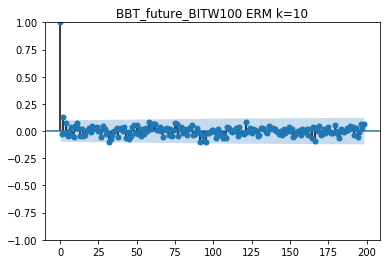

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


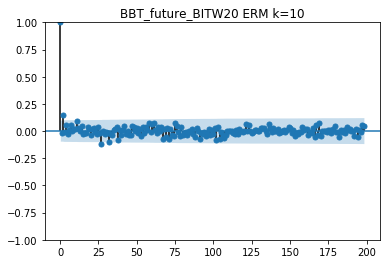

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


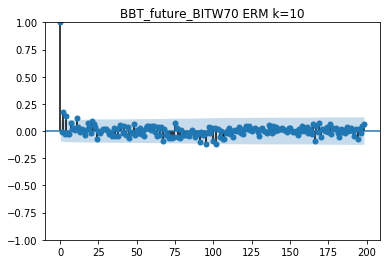

400 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


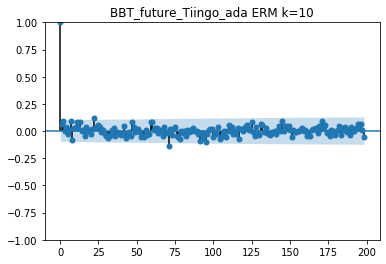

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


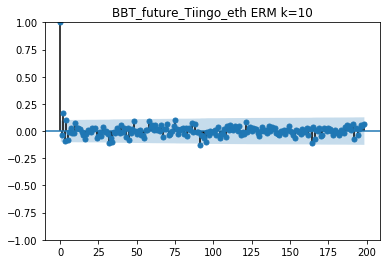

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


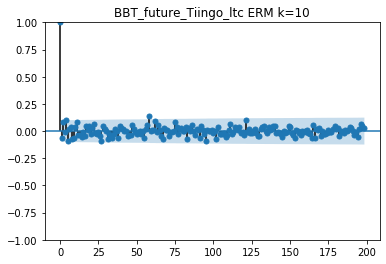

405 2021-05-27 20:00:00+00:00 2019-10-21 20:00:00+00:00


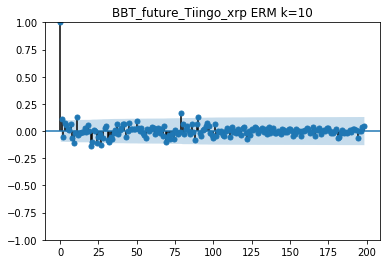

In [3]:
for p, rm in enumerate(risk_measures[:-1]):
    for q, rn in enumerate(order):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    

        _df = pd.read_csv(path)
        _df = _df.loc[_df.Date >= start,:] 
        print(len(_df), _df.Date.iloc[0], _df.Date.iloc[-1])
        ax1 = plt.subplot(1, 1, 1)
#         plot_acf(_df.rh, lags=198, ax=ax1)
        plot_acf(_df.rs, lags=198, ax=ax1)

        ax1.set_title('%s %s'%(rn, rm))
        plt.show()

rh BBT_future_Tiingo_xrp ERM k=10


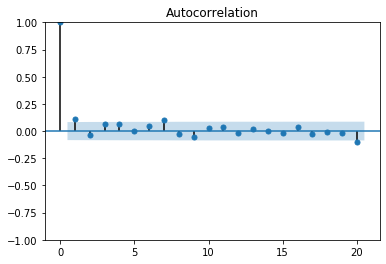

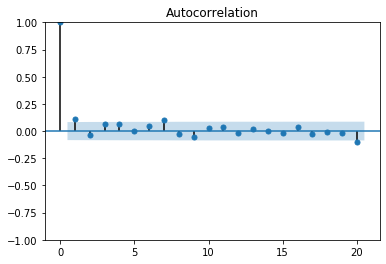

In [4]:
if rm != 'CH':
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
    %(rn, rm)
else:
    path = '../../results/%s/MM/rh_cross_hedge.csv'\
    %(rn)    

_df = pd.read_csv(path)
plt.figure()
ax1 = plt.subplot(1, 1, 1)
#         plot_acf(_df.rh, lags=198, ax=ax1)
print('rh', rn, rm)
plot_acf(_df.rh, lags=20, ax=ax1)

rs BBT_future_Tiingo_xrp ERM k=10


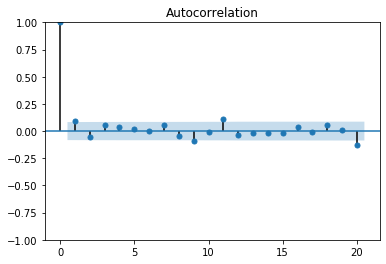

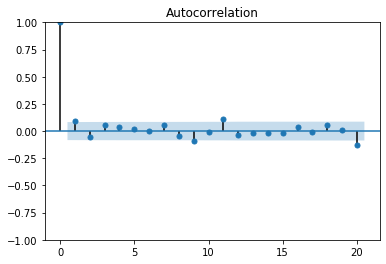

In [5]:
if rm != 'CH':
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
    %(rn, rm)
else:
    path = '../../results/%s/MM/rh_cross_hedge.csv'\
    %(rn)    

_df = pd.read_csv(path)
plt.figure()
ax1 = plt.subplot(1, 1, 1)
print('rs', rn, rm)
plot_acf(_df.rs, lags=20, ax=ax1)
# plt.ylim((0,.25))

In [12]:
_df

,Unnamed: 0,Date,rh,rs,rf,h,copula
0,0,2021-05-27 20:00:00+00:00,-0.016982,-0.012393,0.006583,0.69707,Plackett
1,1,2021-05-26 20:00:00+00:00,0.058170,0.080924,0.032643,0.69707,Plackett
2,2,2021-05-25 20:00:00+00:00,0.024834,-0.018555,-0.062245,0.69707,Plackett
3,3,2021-05-24 20:00:00+00:00,-0.125099,-0.059344,0.094330,0.69707,Plackett
4,4,2021-05-21 20:00:00+00:00,-0.101217,-0.177064,-0.108809,0.69707,Plackett
...,...,...,...,...,...,...,...
400,0,2019-10-25 20:00:00+00:00,-0.047485,0.058304,0.150143,0.70459,rotGumbel
401,1,2019-10-24 20:00:00+00:00,0.046451,0.045982,-0.000666,0.70459,rotGumbel
402,2,2019-10-23 20:00:00+00:00,-0.034962,-0.099936,-0.092217,0.70459,rotGumbel
403,3,2019-10-22 20:00:00+00:00,0.013992,0.012282,-0.002427,0.70459,rotGumbel


In [6]:

seed = 0
T = len(_df)
X = _df.copy()
p = 1/100
np.random.seed(seed)
    # X: time series to be sampled
    # p: param of Geometric distribution; 1/p = mean of block sample length
    # T: length of pseudo time series    
sampleLength = 0
s = []
count = 0
while sampleLength < T:
    I = int(np.random.choice(len(X), 1, replace=True))
    L = int(np.random.geometric(p=p, size=1))
    _id = np.linspace(I, I+L-1, num=L)
    _id = (_id % len(X)).astype(int)
    s.append(X.loc[_id, :])
    count+=1
    sampleLength += len(_id)
    print(count, len(_id), sampleLength)
s = pd.concat(s).iloc[:T]

1 125 125
2 55 180
3 49 229
4 6 235
5 49 284
6 167 451
7 84 535
8 8 543
9 46 589


In [7]:
# Stationary Block Bootstrap 2.7.2 of Lahiri
def SB(X, p, T, seed):
    np.random.seed(seed)
    # X: time series to be sampled
    # p: param of Geometric distribution; 1/p = mean of block sample length
    # T: length of pseudo time series    
    blockL = 0
    s = []
    while blockL < T:
        I = int(np.random.choice(len(X), 1, replace=True))
        L = int(np.random.geometric(p=p, size=1))
        _id = np.linspace(I, I+L-1, num=L)
        _id = (_id % len(X)).astype(int)
        blockL += len(_id)
        s.append(X.loc[_id, :])
    return pd.concat(s).iloc[:T]

@ray.remote(num_returns=1)
def SB_parallel(X, p, T, seed):
    return SB(X, p, T, seed)

In [8]:
def BB(_df, n, L): # Block Bootstrapping
    I = np.random.choice(len(_df), n, replace=True)
    _df_repeated = pd.concat([_df, _df], axis=0).reset_index(drop=True)
    bootstrapSamples = [_df_repeated.loc[i:i+L] for i in I]
    return bootstrapSamples

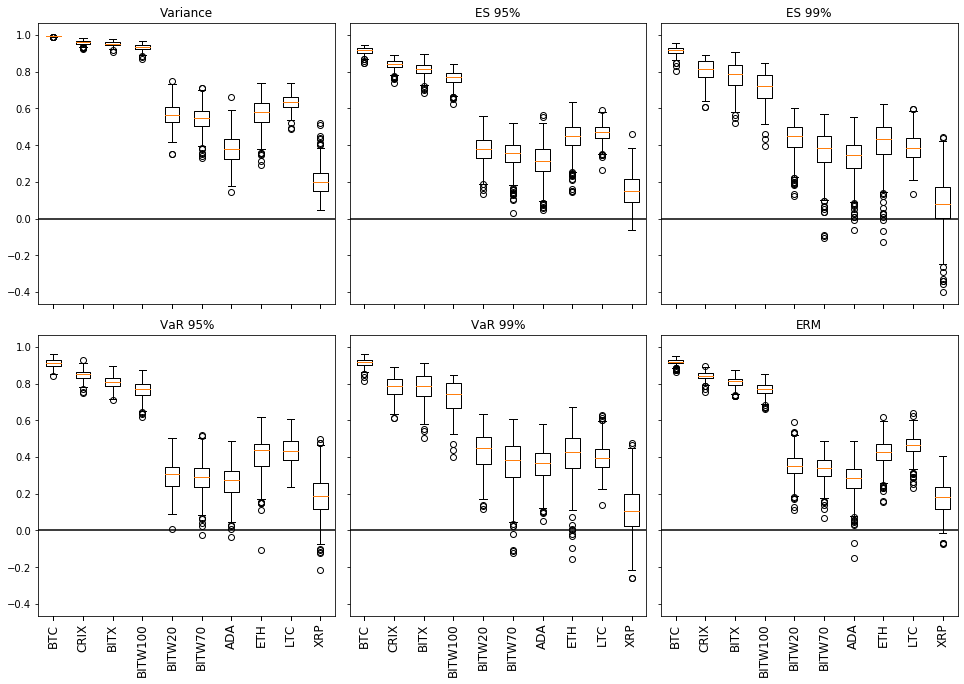

In [9]:
factor = 4.5
xsize = 3*factor
ysize = 2*factor
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

N = 500 # number of samples
T = 300 # length of each sample
prob = 1/5
seed_arr = set(list(range(N)))

HE_outer2 = []
length_outer2 = []

for p, rm in enumerate(risk_measures[:-1]):
    HE_outer = []
    length_outer = []
    
    risk_fn = rm_dict[rm]
    
    for q, rn in enumerate(order):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
            
        _df = pd.read_csv(path)
        _df = _df.loc[_df.Date >= start,:] 
        
        samples = ray.get([SB_parallel.remote(_df,
                                              prob,
                                              T, 
                                              seed) for seed in seed_arr])

        HE = []
        length = []
        for s in samples:
            s = np.array(s.loc[:,['rh','rs']])
            risk_rh = risk_fn(s[:,0])
            risk_rs = risk_fn(s[:,1])
            HE.append(1-risk_rh/risk_rs)
            length.append(len(s))
            
        HE_outer.append(HE)
            
    HE_outer2.append(HE_outer)
    length_outer2.append(length_outer)

    if p<=2:
        axs[0, p].boxplot(HE_outer, showfliers=True)
        axs[0, p].set_title(rm2name[rm])
        axs[0, p].axhline(y=0, xmin=0, xmax=1, color='black')

    else:
        axs[1, p-3].boxplot(HE_outer, showfliers=True)
        axs[1, p-3].set_title(rm2name[rm], fontsize=12)
        axs[1, p-3].axhline(y=0, xmin=0, xmax=1, color='black')

plt.tight_layout()

for p, a in enumerate(axs):
    xtickNames = plt.setp(axs[p], xticklabels=new_coin_names)
    plt.setp(xtickNames, rotation=90, fontsize=12)
    
plt.savefig('HE_boxplot.pdf', transparent=True)

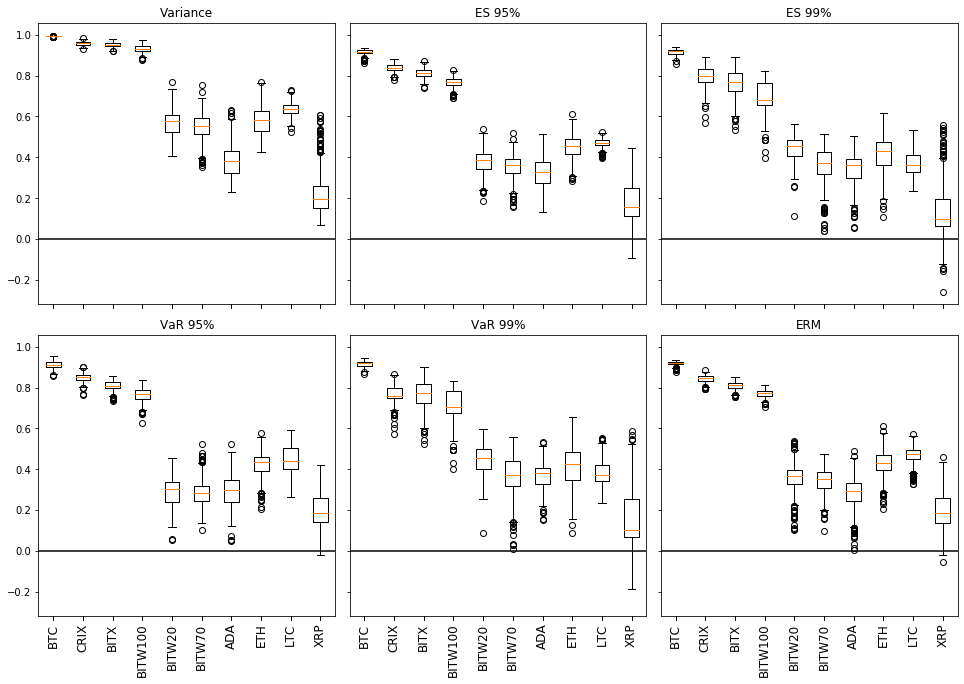

In [42]:
factor = 4.5
xsize = 3*factor
ysize = 2*factor
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)


N = 400 # number of samples
T = 400 # length of each sample
prob = 1/100
seed_arr = set(list(range(N)))

HE_outer2 = []
length_outer2 = []

for p, rm in enumerate(risk_measures[:-1]):
    HE_outer = []
    length_outer = []
    
    risk_fn = rm_dict[rm]
    
    for q, rn in enumerate(order):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
            
        _df = pd.read_csv(path)
        _df = _df.loc[_df.Date >= start,:] 
        
        samples = ray.get([SB_parallel.remote(_df,
                                              prob,
                                              T, 
                                              seed) for seed in seed_arr])

        HE = []
        length = []
        for s in samples:
            s = np.array(s.loc[:,['rh','rs']])
            risk_rh = risk_fn(s[:,0])
            risk_rs = risk_fn(s[:,1])
            HE.append(1-risk_rh/risk_rs)
            length.append(len(s))
            
        HE_outer.append(HE)
            
    HE_outer2.append(HE_outer)
    length_outer2.append(length_outer)

    if p<=2:
        axs[0, p].boxplot(HE_outer, showfliers=True)
        axs[0, p].set_title(rm2name[rm])
        axs[0, p].axhline(y=0, xmin=0, xmax=1, color='black')

    else:
        axs[1, p-3].boxplot(HE_outer, showfliers=True)
        axs[1, p-3].set_title(rm2name[rm], fontsize=12)
        axs[1, p-3].axhline(y=0, xmin=0, xmax=1, color='black')


plt.tight_layout()

for p, a in enumerate(axs):
    xtickNames = plt.setp(axs[p], xticklabels=new_coin_names)
    plt.setp(xtickNames, rotation=90, fontsize=12)

In [95]:
def plotBBresults(n, L):
    factor = 4.5
    xsize = 3*factor
    ysize = 2*factor
    fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

    n = 200
    L = 150

    HE_outer2 = []
    length_outer2 = []

    for p, rm in enumerate(risk_measures[:-1]):
        HE_outer = []
        length_outer = []

        risk_fn = rm_dict[rm]

        for q, rn in enumerate(order):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    

            _df = pd.read_csv(path)

            _df = _df.loc[_df.Date >= start,:] 

            samples = BB(_df.loc[:,['rh', 'rs']], n, L)

            HE = []
            length = []
            for s in samples:
                s = np.array(s)
                risk_rh = risk_fn(s[:,0])
                risk_rs = risk_fn(s[:,1])
                HE.append(1-risk_rh/risk_rs)
                length.append(len(s))

            HE_outer.append(HE)

        HE_outer2.append(HE_outer)
        length_outer2.append(length_outer)

        if p<=2:
            axs[0, p].boxplot(HE_outer, showfliers=True)
            axs[0, p].set_title(rm2name[rm])
            axs[0, p].axhline(y=0, xmin=0, xmax=1, color='black')

        else:
            axs[1, p-3].boxplot(HE_outer, showfliers=True)
            axs[1, p-3].set_title(rm2name[rm], fontsize=12)
            axs[1, p-3].axhline(y=0, xmin=0, xmax=1, color='black')


    plt.tight_layout()

    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=new_coin_names)
        plt.setp(xtickNames, rotation=90, fontsize=12)

In [103]:
_df = pd.read_csv(path)

_df

,Unnamed: 0,Date,rh,rs,rf,h,copula
0,0,2021-05-27 20:00:00+00:00,-0.016982,-0.012393,0.006583,0.697070,Plackett
1,1,2021-05-26 20:00:00+00:00,0.058170,0.080924,0.032643,0.697070,Plackett
2,2,2021-05-25 20:00:00+00:00,0.024834,-0.018555,-0.062245,0.697070,Plackett
3,3,2021-05-24 20:00:00+00:00,-0.125099,-0.059344,0.094330,0.697070,Plackett
4,4,2021-05-21 20:00:00+00:00,-0.101217,-0.177064,-0.108809,0.697070,Plackett
...,...,...,...,...,...,...,...
555,0,2019-03-18 20:00:00+00:00,-0.035860,-0.017956,0.015267,1.172656,Plackett
556,1,2019-03-15 20:00:00+00:00,0.007379,0.025560,0.015504,1.172656,Plackett
557,2,2019-03-14 20:00:00+00:00,-0.015513,-0.013985,0.001303,1.172656,Plackett
558,3,2019-03-13 20:00:00+00:00,0.012411,0.012411,0.000000,1.172656,Plackett


In [100]:
len(_df)

405

n: 100 ; L: 200


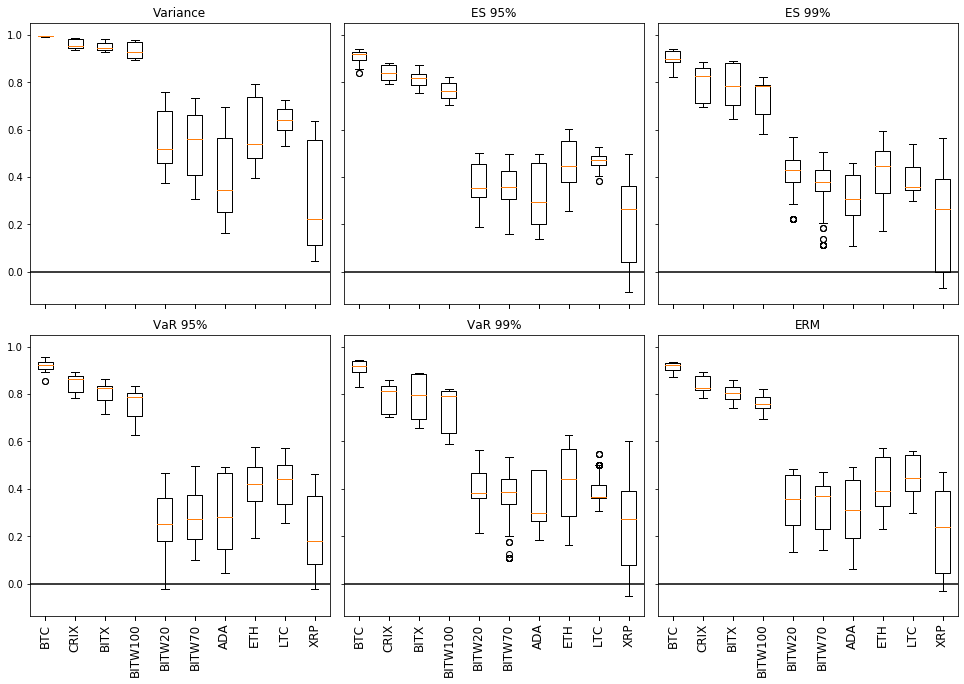

In [96]:
n = 100
L = 200

print('n:',n,'; L:',L)
plotBBresults(n, L)

n: 100 ; L: 250


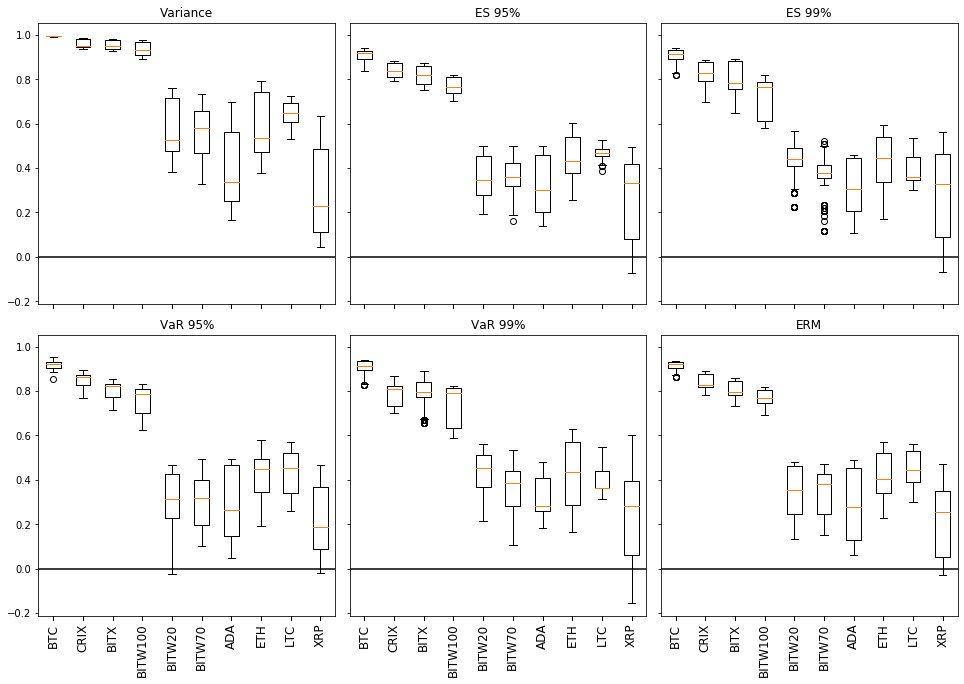

In [97]:
n = 100
L = 250
print('n:',n,'; L:',L)
plotBBresults(n, L)

n: 100 ; L: 300


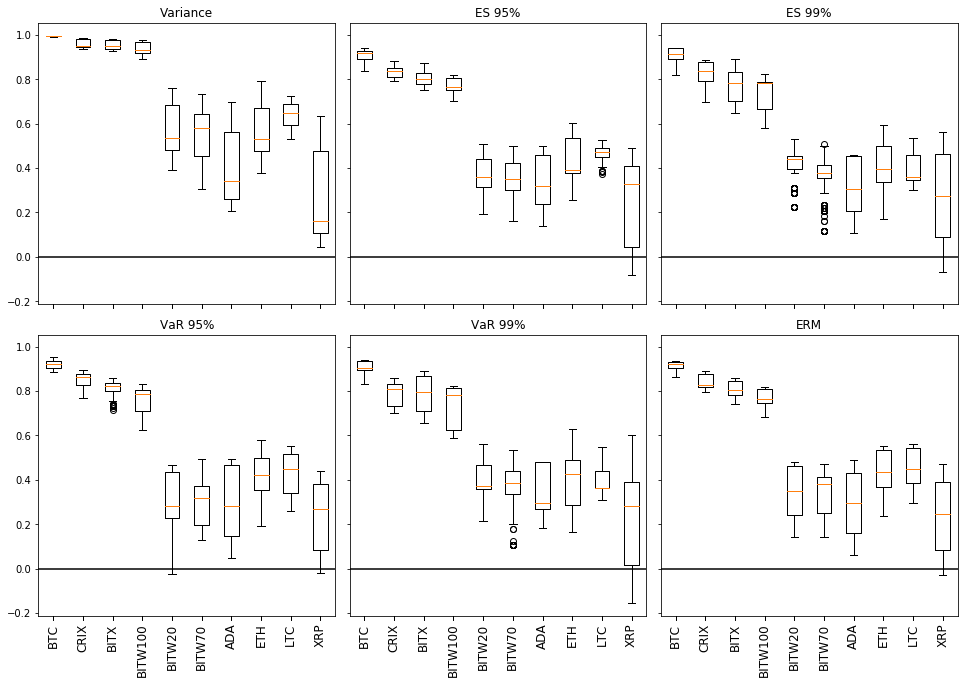

In [98]:
n = 100
L = 300
print('n:',n,'; L:',L)
plotBBresults(n, L)

n: 100 ; L: 400


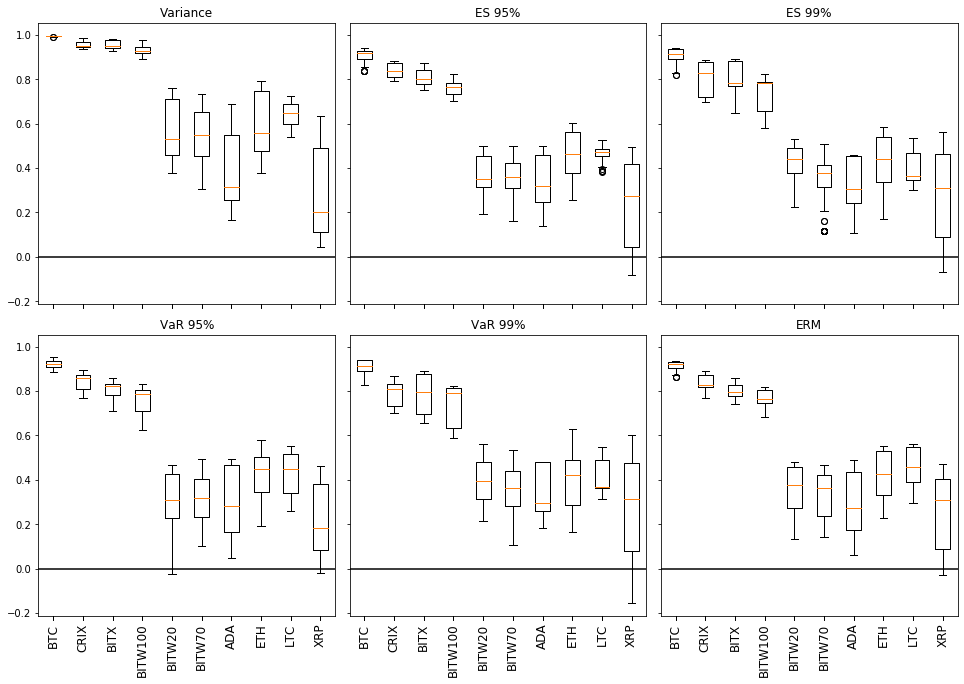

In [99]:
n = 100
L = 400
print('n:',n,'; L:',L)
plotBBresults(n, L)

In [104]:
_df

,Unnamed: 0,Date,rh,rs,rf,h,copula
0,0,2021-05-27 20:00:00+00:00,-0.016982,-0.012393,0.006583,0.697070,Plackett
1,1,2021-05-26 20:00:00+00:00,0.058170,0.080924,0.032643,0.697070,Plackett
2,2,2021-05-25 20:00:00+00:00,0.024834,-0.018555,-0.062245,0.697070,Plackett
3,3,2021-05-24 20:00:00+00:00,-0.125099,-0.059344,0.094330,0.697070,Plackett
4,4,2021-05-21 20:00:00+00:00,-0.101217,-0.177064,-0.108809,0.697070,Plackett
...,...,...,...,...,...,...,...
555,0,2019-03-18 20:00:00+00:00,-0.035860,-0.017956,0.015267,1.172656,Plackett
556,1,2019-03-15 20:00:00+00:00,0.007379,0.025560,0.015504,1.172656,Plackett
557,2,2019-03-14 20:00:00+00:00,-0.015513,-0.013985,0.001303,1.172656,Plackett
558,3,2019-03-13 20:00:00+00:00,0.012411,0.012411,0.000000,1.172656,Plackett
